In [ ]:
# Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [19]:
df = pd.read_csv('/Users/manishwagle/Desktop/Air Quality Intelligence/data/processed/processed_data.csv')

In [20]:
df.columns

Index(['Datetime', 'PM10 (μg/m³)', 'PM2.5 (μg/m³)', 'CO (μg/m³)',
       'NO2 (μg/m³)', 'SO2 (μg/m³)', 'O3 (μg/m³)', 'AQI', 'UV_Index',
       'Temp (°C)', 'Humidity (%)', 'Wind_Direction (°)', 'Precipitation (mm)',
       'Surface_Pressure (hPa)', 'Pressure_MSL (hPa)', 'Wind_Speed (km/h)',
       'Wind_Gusts (km/h)', 'Cloud_Cover (%)'],
      dtype='object')

In [ ]:
column_mapping = {
    'Datetime': 'datetime',
    'PM10 (μg/m³)': 'pm10',
    'PM2.5 (μg/m³)': 'pm25',
    'CO (μg/m³)': 'co',
    'NO2 (μg/m³)': 'no2',
    'SO2 (μg/m³)': 'so2',
    'O3 (μg/m³)': 'o3',
    'UV_Index': 'uv_index',
    'Temp (°C)': 'temp_c',
    'Humidity (%)': 'humidity',
    'Wind_Direction (°)': 'wind_direction',
    'Precipitation (mm)': 'precipitation',
    'Surface_Pressure (hPa)': 'surface_pressure',
    'Pressure_MSL (hPa)': 'pressure_msl',
    'Wind_Speed (km/h)': 'wind_speed',
    'Wind_Gusts (km/h)': 'wind_gusts',
    'Soil_Moisture (m³/m³)': 'soil_moisture',
    'Soil_Temp (°C)': 'soil_temp_c',
    'Cloud_Cover (%)': 'cloud_cover',
    'AQI': 'aqi'
}

In [22]:
df.rename(columns=column_mapping, inplace=True)

In [23]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [24]:
df.head()

pm10  pm25   co   no2  so2   o3   aqi  uv_index  temp_c  \
datetime                                                                       
2022-08-05 00:00:00  31.7  22.2  478  14.1  5.2   68  58.0      0.05    20.3   
2022-08-05 01:00:00  29.7  20.8  435  11.6  4.5   75  59.0      0.45    21.0   
2022-08-05 02:00:00  25.3  17.7  374   8.2  3.5   85  59.0      1.65    21.7   
2022-08-05 03:00:00  23.1  16.2  303   4.3  2.5   97  60.0      3.80    23.2   
2022-08-05 04:00:00  20.3  14.2  272   2.9  2.0  103  60.0      6.15    25.1   

                     humidity  wind_direction  precipitation  \
datetime                                                       
2022-08-05 00:00:00      98.0           135.0            1.8   
2022-08-05 01:00:00      96.0            79.0            0.1   
2022-08-05 02:00:00      93.0            69.0            0.1   
2022-08-05 03:00:00      86.0            69.0            0.0   
2022-08-05 04:00:00      76.0            59.0            0.0   

                     surface_pressure  pressure_msl  wind_speed  wind_gusts  \
datetime                                                                      
2022-08-05 00:00:00             869.4        1008.1         3.1        14.4   
2022-08-05 01:00:00             870.4        1008.8         1.8        11.5   
2022-08-05 02:00:00             870.8        1009.0         3.1        13.0   
2022-08-05 03:00:00             870.9        1008.3         3.1        14.4   
2022-08-05 04:00:00             870.7        1007.2         2.1        14.8   

                     cloud_cover  
datetime                          
2022-08-05 00:00:00         99.0  
2022-08-05 01:00:00         81.0  
2022-08-05 02:00:00         65.0  
2022-08-05 03:00:00         85.0  
2022-08-05 04:00:00         98.0

In [25]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27337 entries, 2022-08-05 00:00:00 to 2025-09-17 00:00:00
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm10              27337 non-null  float64
 1   pm25              27337 non-null  float64
 2   co                27337 non-null  int64  
 3   no2               27337 non-null  float64
 4   so2               27337 non-null  float64
 5   o3                27337 non-null  int64  
 6   aqi               27337 non-null  float64
 7   uv_index          27337 non-null  float64
 8   temp_c            27337 non-null  float64
 9   humidity          27337 non-null  float64
 10  wind_direction    27337 non-null  float64
 11  precipitation     27337 non-null  float64
 12  surface_pressure  27337 non-null  float64
 13  pressure_msl      27337 non-null  float64
 14  wind_speed        27337 non-null  float64
 15  wind_gusts        27337 non-null  float6

In [26]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               pm10          pm25            co           no2           so2  \
count  27337.000000  27337.000000  27337.000000  27337.000000  27337.000000   
mean      47.079387     34.225032    667.624392     14.333826      6.546669   
std       28.505822     22.594373    458.787916     13.433027      4.555698   
min        0.300000      0.200000     59.000000      0.000000      0.000000   
25%       26.000000     18.300000    341.000000      3.600000      3.500000   
50%       40.500000     28.600000    524.000000     10.700000      5.500000   
75%       62.600000     43.800000    831.000000     21.200000      8.100000   
max      221.200000    170.400000   3204.000000    107.300000     37.500000   

                 o3           aqi      uv_index        temp_c      humidity  \
count  27337.000000  27337.000000  27337.000000  27337.000000  27337.000000   
mean      95.476607     98.755825      1.353146     18.465841     75.186341   
std       36.926795     36

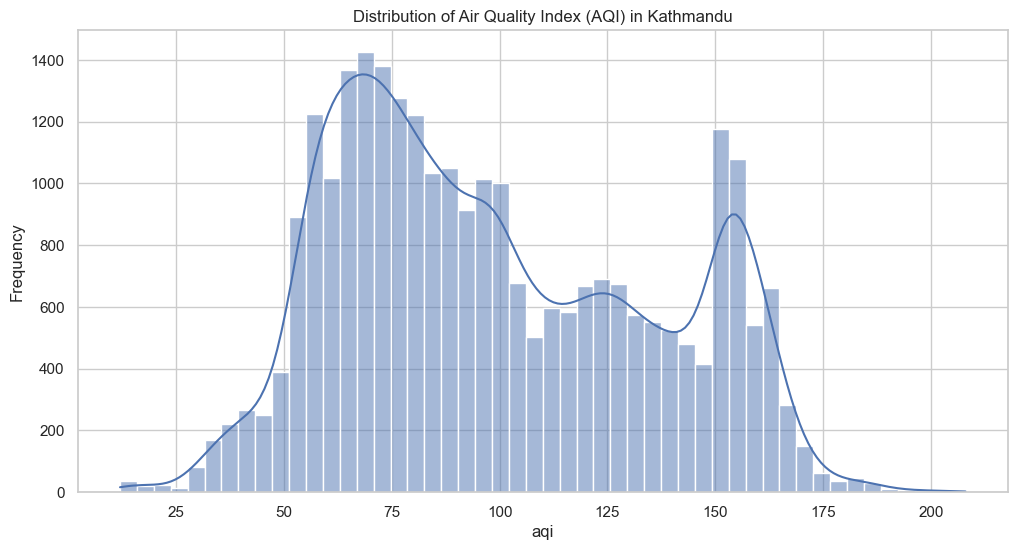

In [27]:
# Set up the plot style
sns.set(style="whitegrid")

# Distribution of the main AQI value
plt.figure(figsize=(12, 6))
sns.histplot(df['aqi'], kde=True, bins=50)
plt.title('Distribution of Air Quality Index (AQI) in Kathmandu')
plt.xlabel('aqi')
plt.ylabel('Frequency')
plt.show()

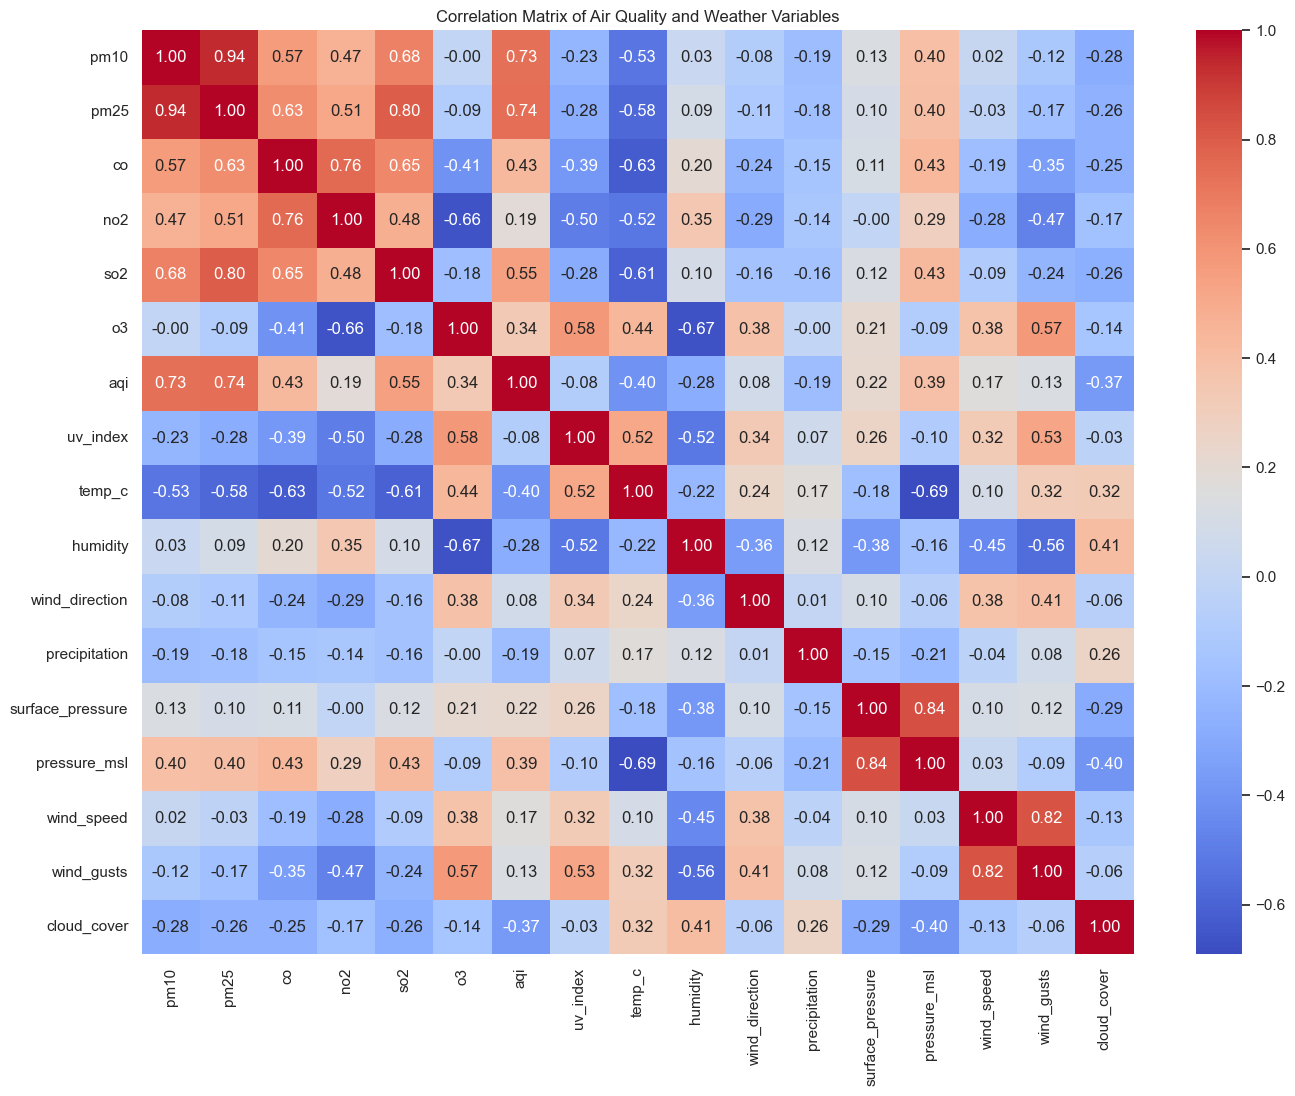

In [28]:
# Correlation Matrix Heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality and Weather Variables')
plt.show()

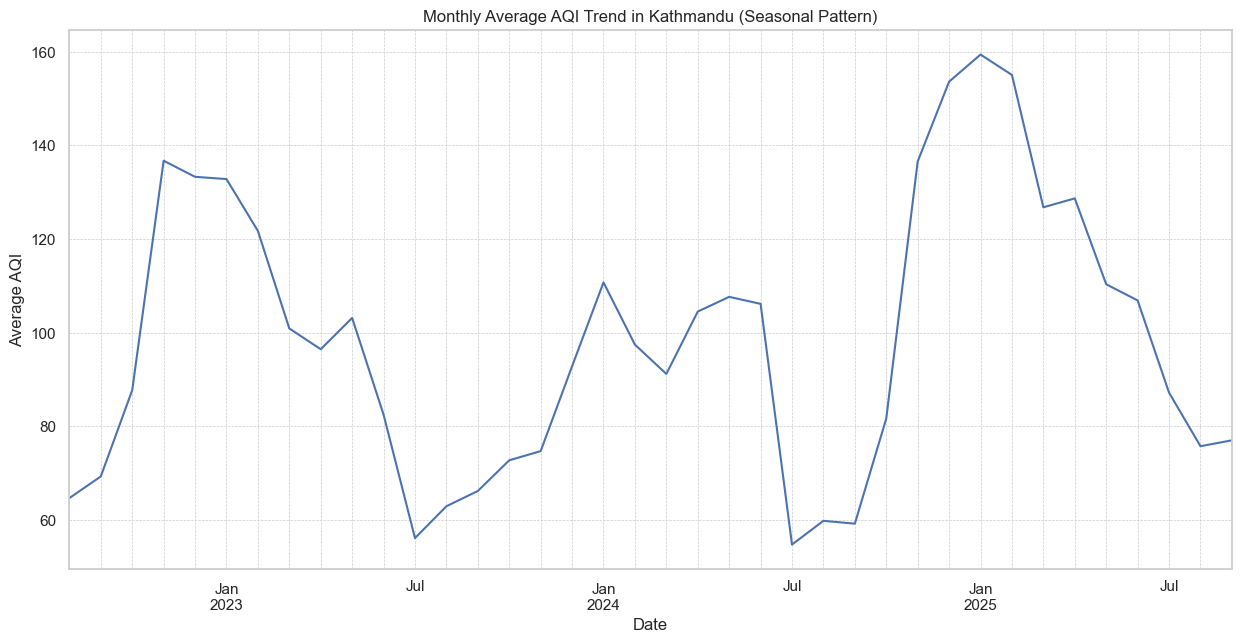

In [29]:
# Seasonal Analysis: Average AQI per month
# Resample to get the mean AQI for each month
monthly_aqi = df['aqi'].resample('ME').mean()

plt.figure(figsize=(15, 7))
monthly_aqi.plot()
plt.title('Monthly Average AQI Trend in Kathmandu (Seasonal Pattern)')
plt.ylabel('Average AQI')
plt.xlabel('Date')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

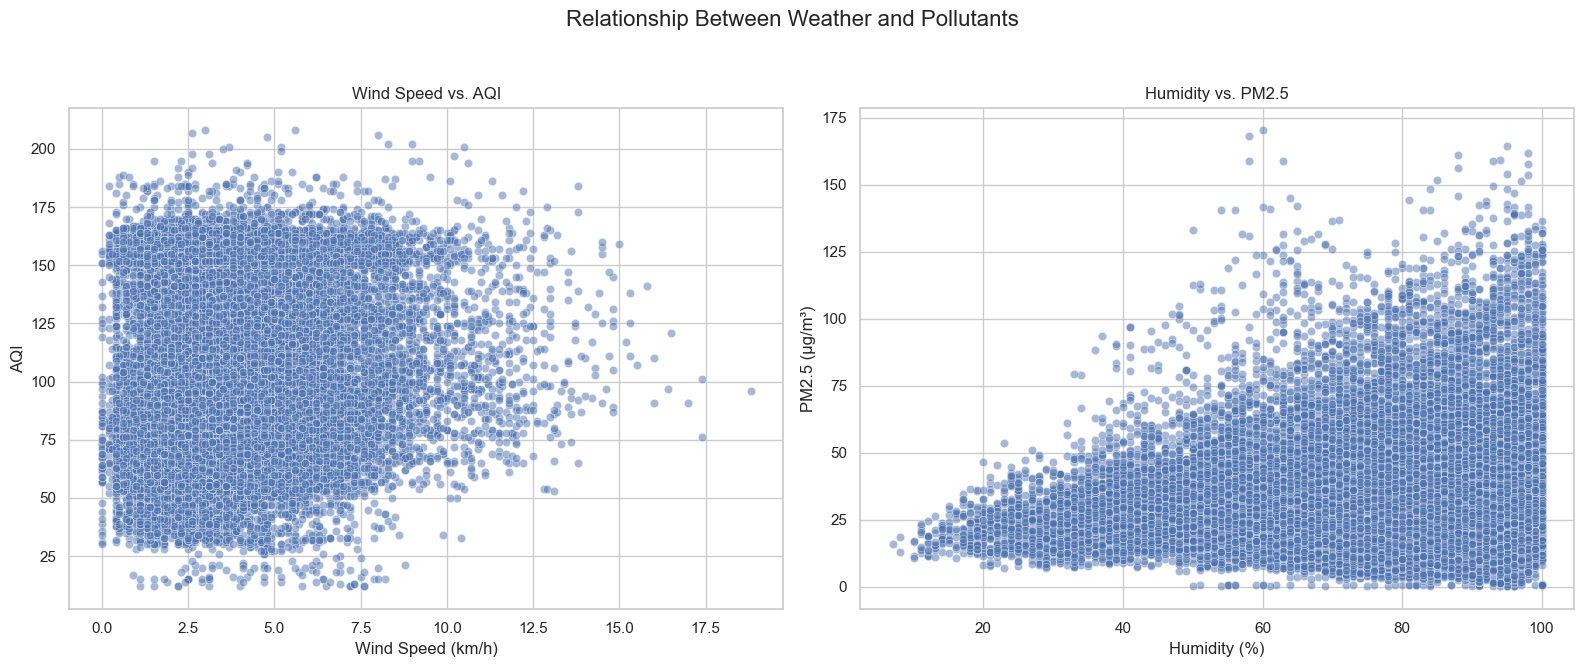

In [30]:
# Create a 1-row, 2-column grid for the plots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Relationship Between Weather and Pollutants', fontsize=16)

# --- Plot 1: Wind Speed vs. AQI ---
sns.scatterplot(ax=axes[0], x='wind_speed', y='aqi', data=df, alpha=0.5)
axes[0].set_title('Wind Speed vs. AQI')
axes[0].set_xlabel('Wind Speed (km/h)')
axes[0].set_ylabel('AQI')

# --- Plot 2: Humidity vs. PM2.5 ---
sns.scatterplot(ax=axes[1], x='humidity', y='pm25', data=df, alpha=0.5)
axes[1].set_title('Humidity vs. PM2.5')
axes[1].set_xlabel('Humidity (%)')
axes[1].set_ylabel('PM2.5 (μg/m³)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

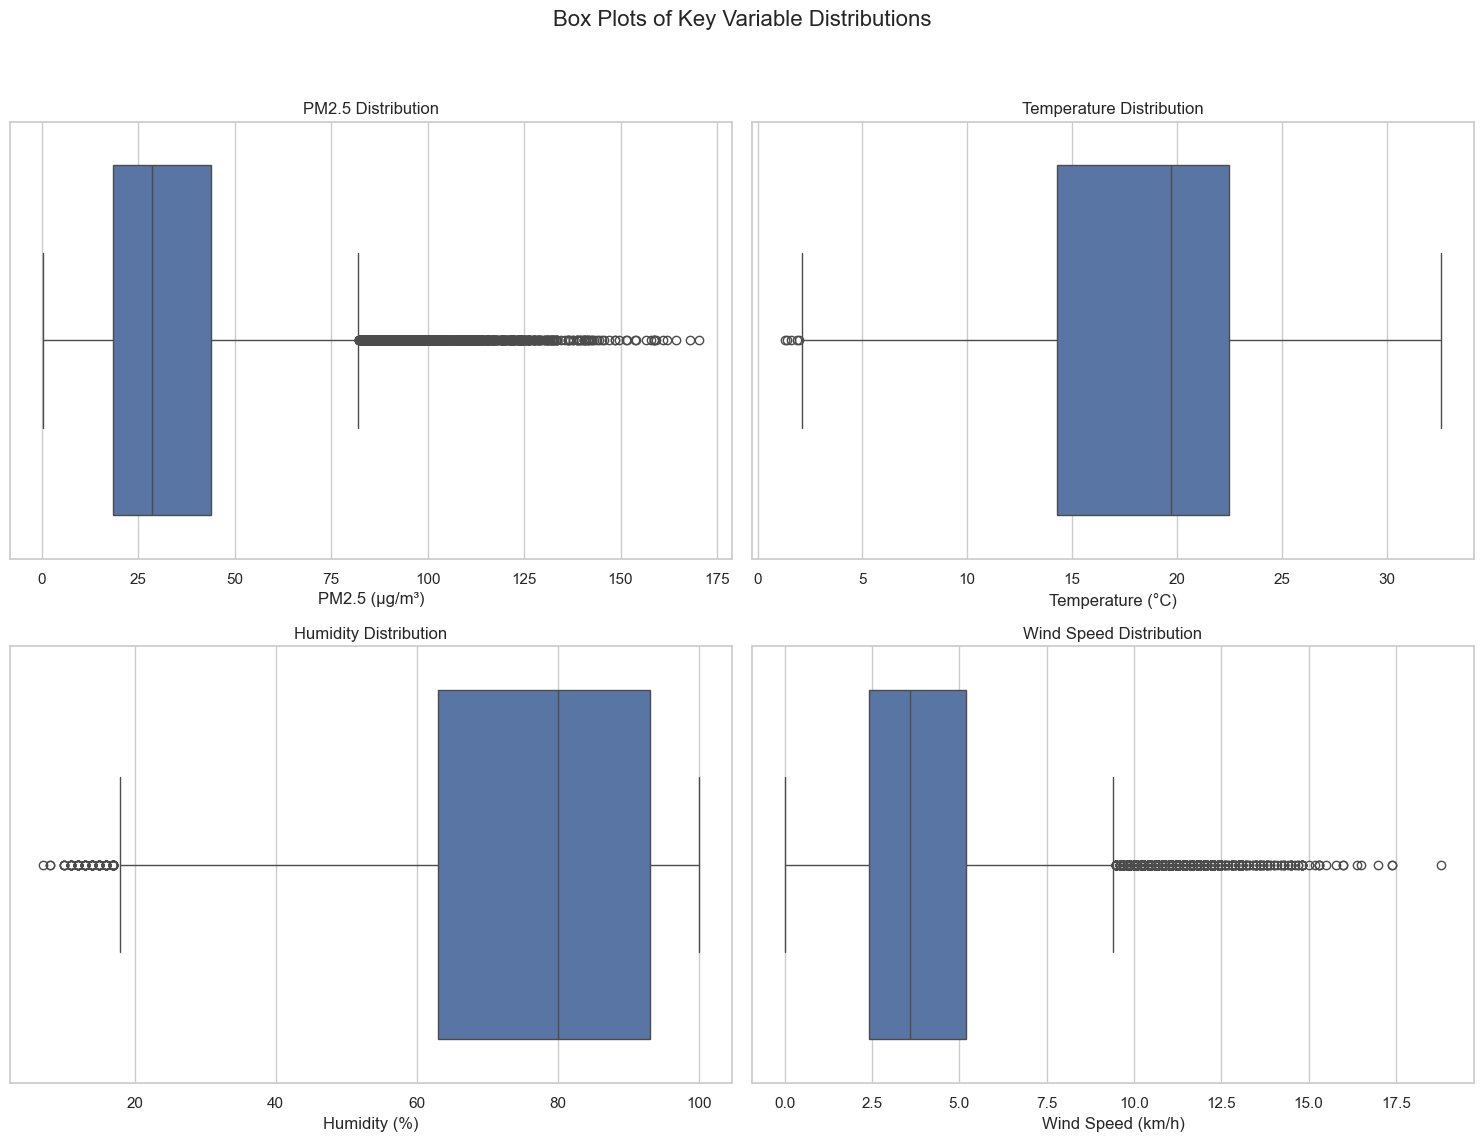

In [31]:
# Create a 2-row, 2-column grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Box Plots of Key Variable Distributions', fontsize=16)

# --- Plot 1: PM2.5 ---
sns.boxplot(ax=axes[0, 0], x=df['pm25'])
axes[0, 0].set_title('PM2.5 Distribution')
axes[0, 0].set_xlabel('PM2.5 (μg/m³)')

# --- Plot 2: Temperature ---
sns.boxplot(ax=axes[0, 1], x=df['temp_c'])
axes[0, 1].set_title('Temperature Distribution')
axes[0, 1].set_xlabel('Temperature (°C)')

# --- Plot 3: Humidity ---
sns.boxplot(ax=axes[1, 0], x=df['humidity'])
axes[1, 0].set_title('Humidity Distribution')
axes[1, 0].set_xlabel('Humidity (%)')

# --- Plot 4: Wind Speed ---
sns.boxplot(ax=axes[1, 1], x=df['wind_speed'])
axes[1, 1].set_title('Wind Speed Distribution')
axes[1, 1].set_xlabel('Wind Speed (km/h)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

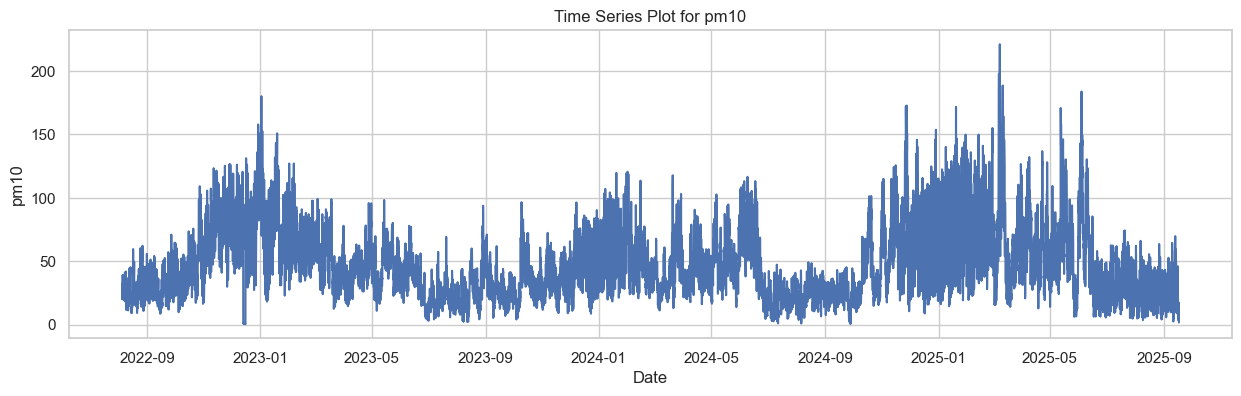

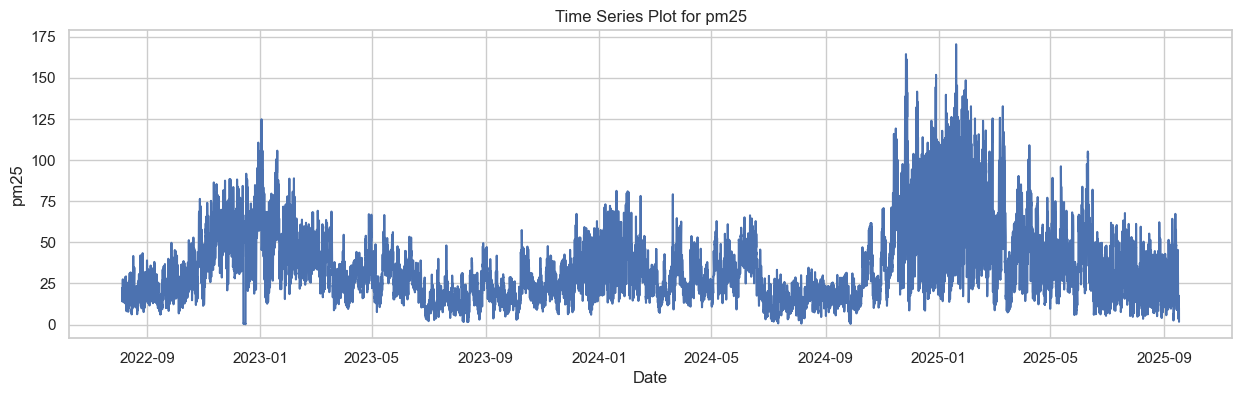

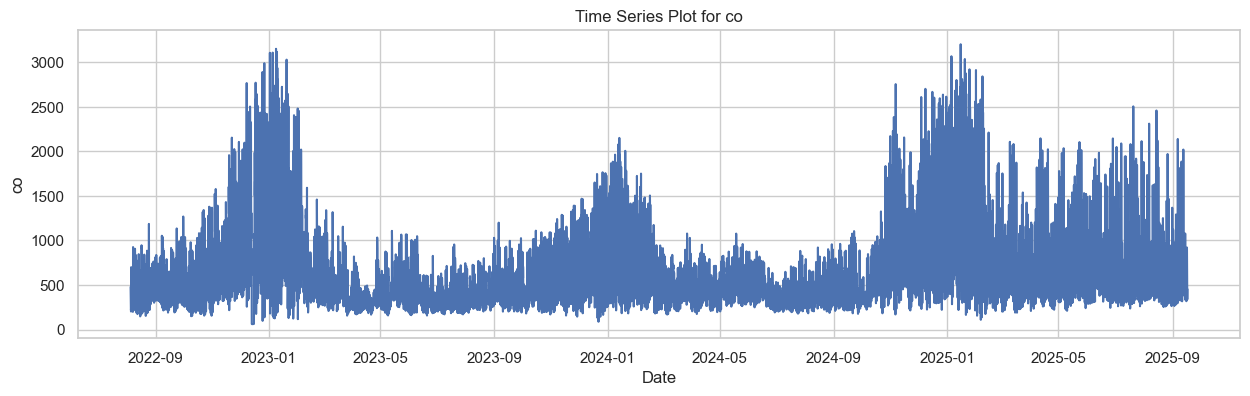

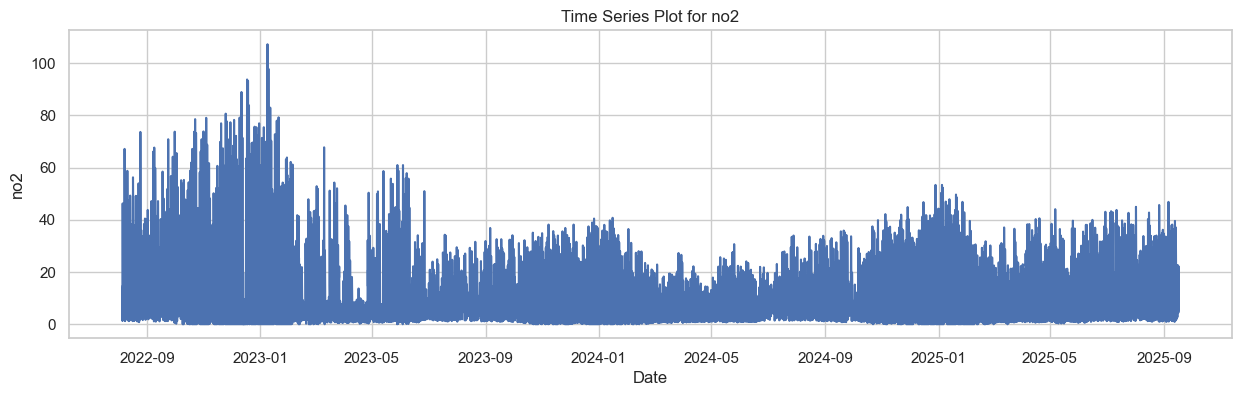

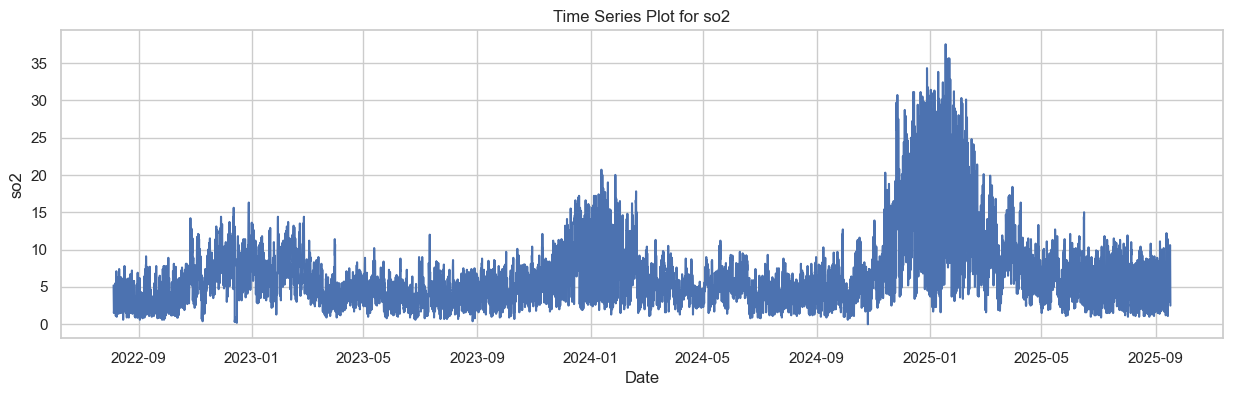

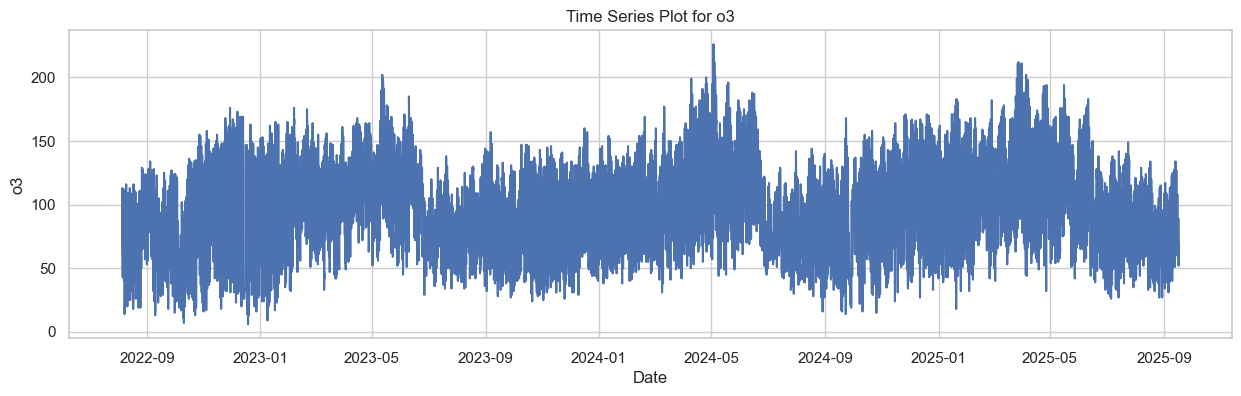

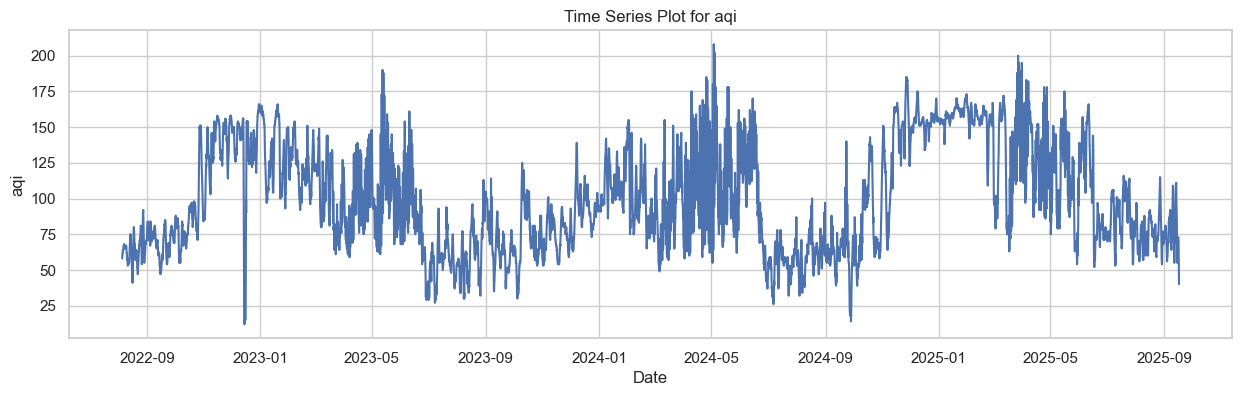

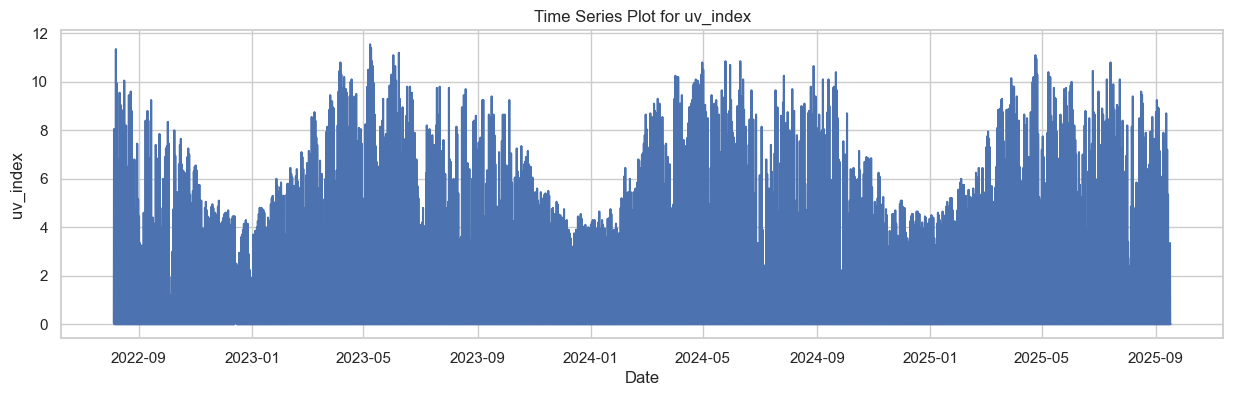

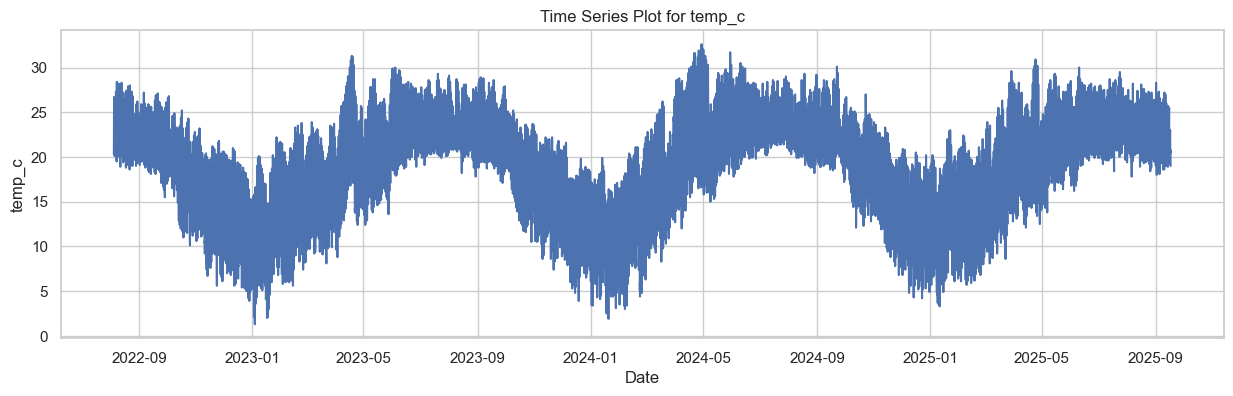

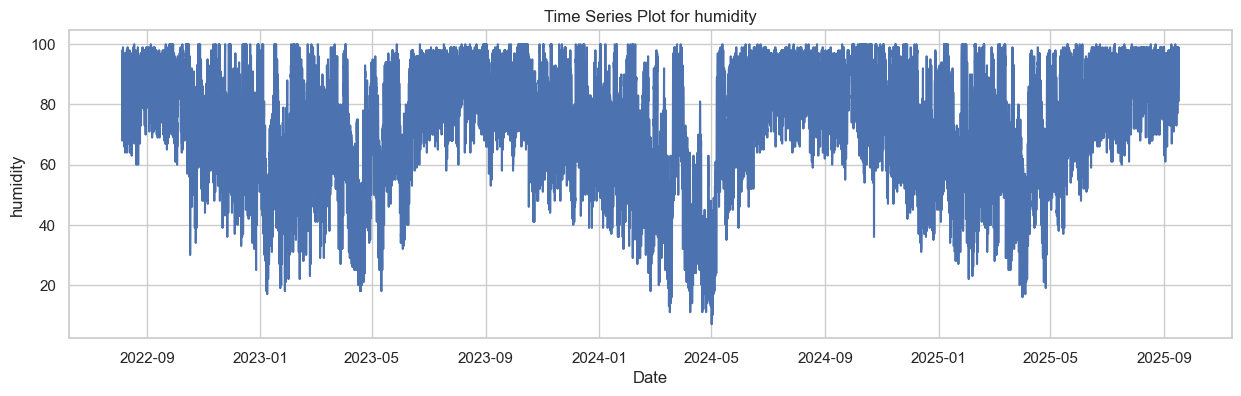

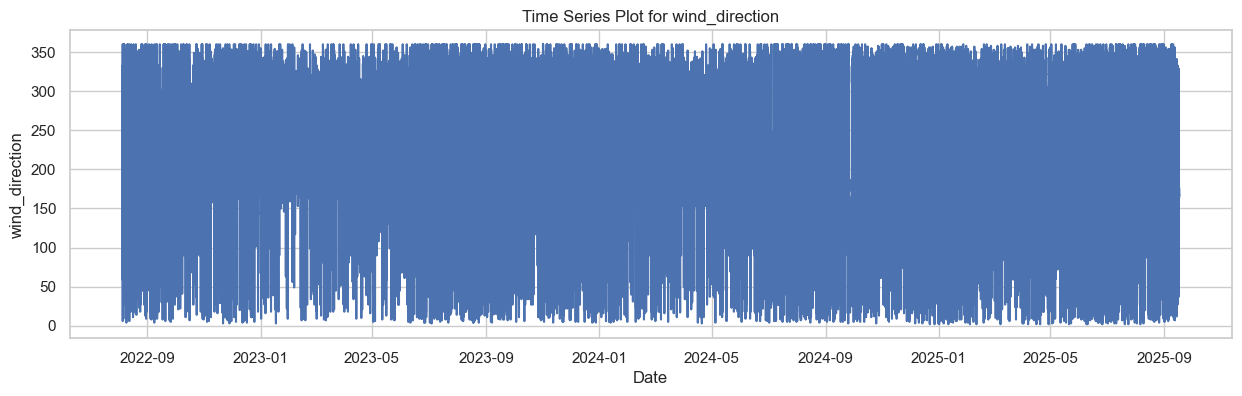

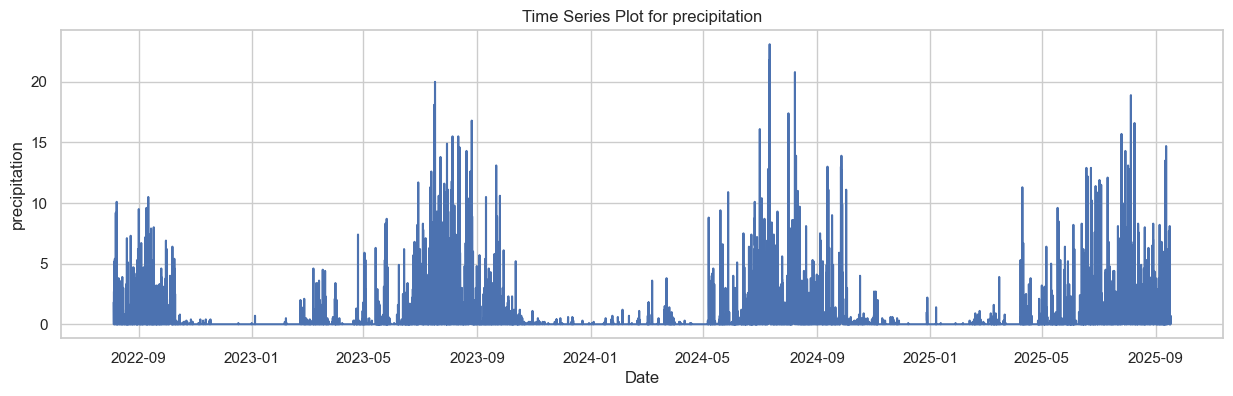

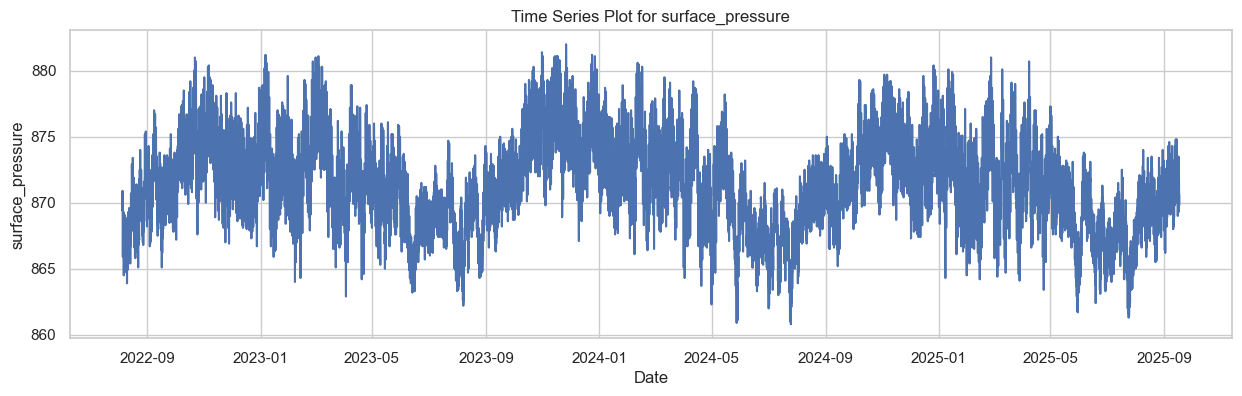

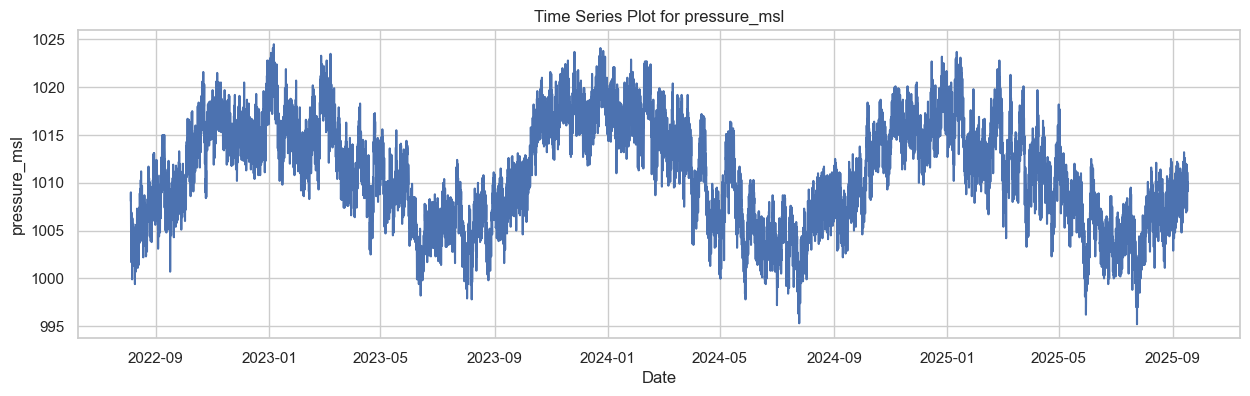

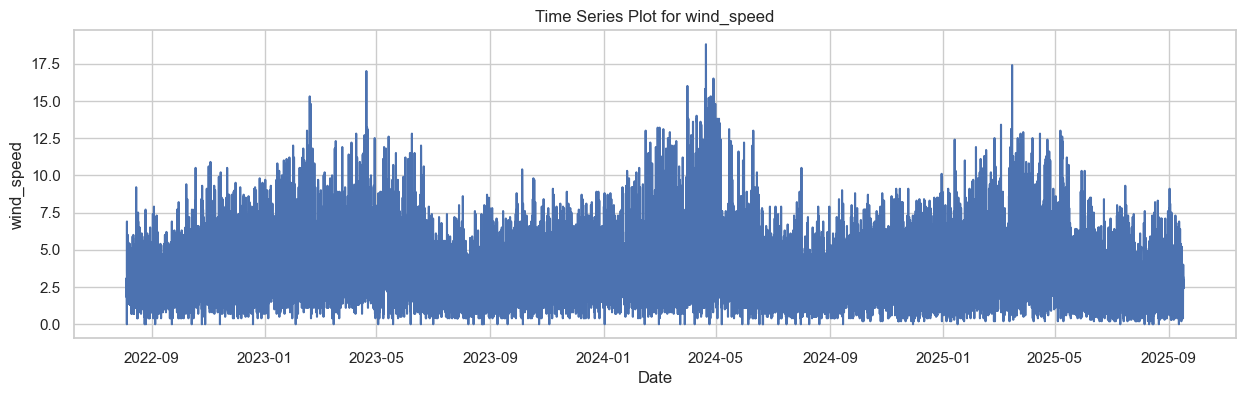

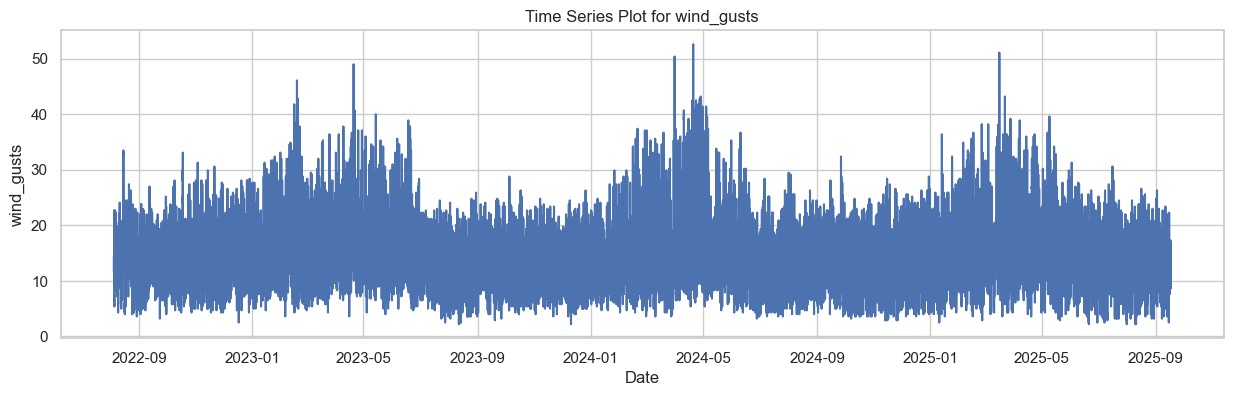

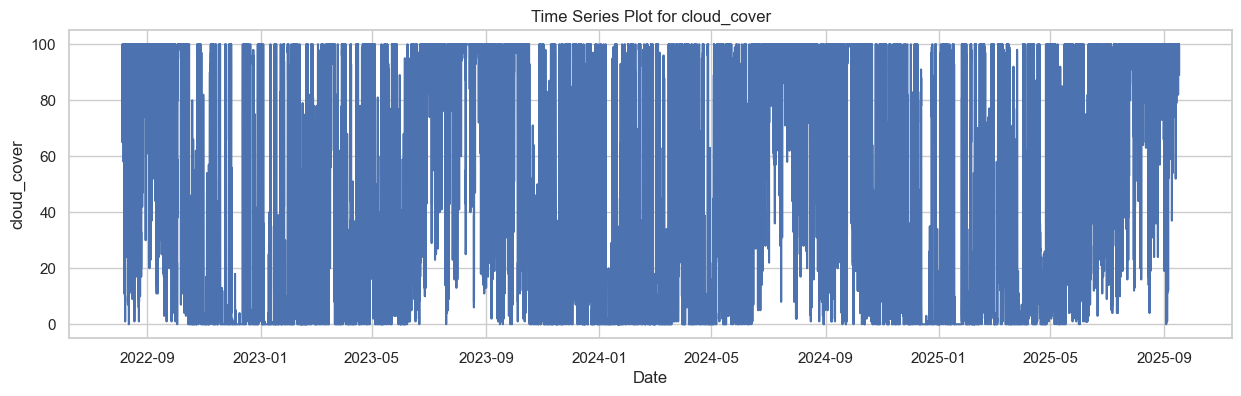

In [32]:
for column in df.columns:
    plt.figure(figsize=(15, 4))
    plt.plot(df.index, df[column])
    plt.title(f'Time Series Plot for {column}')
    plt.ylabel(column)
    plt.xlabel('Date')
    plt.grid(True)
    plt.show()

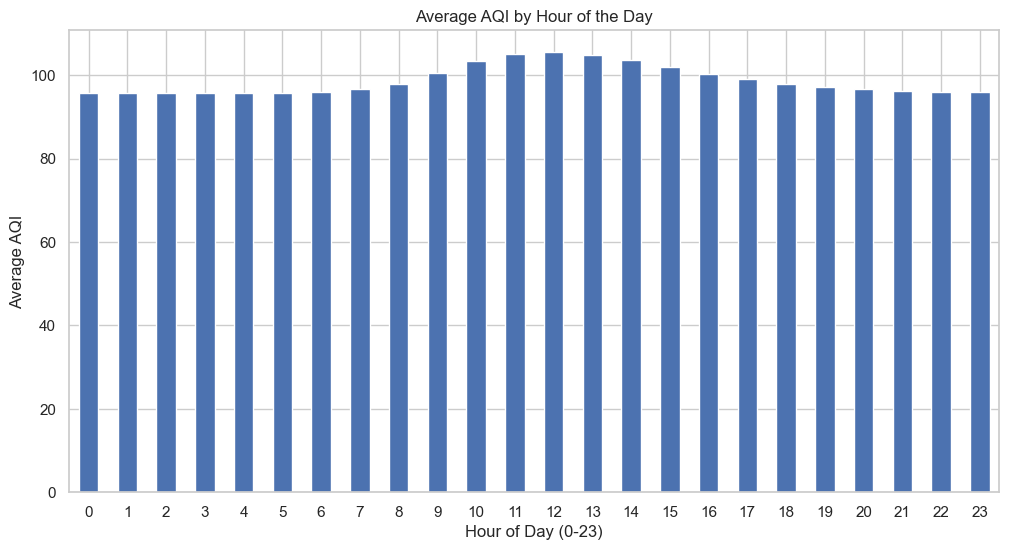

In [33]:
# Diurnal (Daily) Pattern Analysis: Average AQI by hour
df['hour'] = df.index.hour
hourly_aqi = df.groupby('hour')['aqi'].mean()

plt.figure(figsize=(12, 6))
hourly_aqi.plot(kind='bar')
plt.title('Average AQI by Hour of the Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.show()

In [34]:

# Feature Engineering for visualizations
df['hour'] = df.index.hour
df['month'] = df.index.month
df['aqi_rolling_30d'] = df['aqi'].rolling(window='30D').mean()

# Aggregate data for plots
hourly_avg = df.groupby('hour')[['aqi', 'pm25', 'no2']].mean()
pollutant_avg = df[['pm25', 'pm10', 'co', 'no2', 'so2', 'o3']].mean().sort_values(ascending=False)
corr = df[['aqi', 'pm25', 'temp_c', 'humidity', 'wind_speed', 'precipitation']].corr()

# --- 2. Create the Interactive Dashboard Figure ---

# Initialize a 3x2 subplot grid with standard types
fig = make_subplots(
    rows=3, cols=2,
    specs=[
        [{"type": "scatter"}, {"type": "barpolar"}],
        [{"type": "bar"}, {"type": "scatter"}],
        [{"type": "heatmap"}, {"type": "scatter"}]
    ],
    subplot_titles=(
        "1. AQI Over Time with 30-Day Trend",
        "2. Diurnal (Hourly) Pollution Cycle",
        "3. Average Pollutant Concentrations",
        "4. Wind Speed vs. AQI (Color by Temp)",
        "5. Correlation Heatmap",
        "6. Humidity vs. AQI"  # <-- Updated Title
    )
)

# --- 3. Add Traces (Plots) to the Grid ---

# 1️ AQI Time Series with Rolling Average
fig.add_trace(go.Scatter(
    x=df.index, y=df['aqi'], mode='lines', name='Hourly AQI',
    line=dict(color='#ff7f0e', width=0.5), opacity=0.7
), row=1, col=1)
fig.add_trace(go.Scatter(
    x=df.index, y=df['aqi_rolling_30d'], mode='lines', name='30-Day Trend',
    line=dict(color='#1f77b4', width=2.5)
), row=1, col=1)


# 2️ Diurnal (Hourly) Pollution Cycle (Polar Bar Chart)
fig.add_trace(go.Barpolar(
    r=hourly_avg['pm25'], theta=hourly_avg.index * 15,
    name='PM2.5', marker_color='#d62728'
), row=1, col=2)
fig.add_trace(go.Barpolar(
    r=hourly_avg['no2'], theta=hourly_avg.index * 15,
    name='NO2', marker_color='#9467bd'
), row=1, col=2)


# 3️ Average Pollutant Concentrations
fig.add_trace(go.Bar(
    x=pollutant_avg.index, y=pollutant_avg.values, name="Avg. Concentration",
    marker_color='#2ca02c'
), row=2, col=1)


# 4️ Wind Speed vs. AQI Scatter Plot
fig.add_trace(go.Scatter(
    x=df['wind_speed'], y=df['aqi'], mode='markers', name='Wind vs AQI',
    marker=dict(color=df['temp_c'], colorscale='YlOrRd', showscale=True, colorbar_title='Temp (°C)'),
    opacity=0.6
), row=2, col=2)


# 5️ Correlation Heatmap
fig.add_trace(go.Heatmap(
    z=corr.values, x=corr.columns, y=corr.columns,
    colorscale="RdBu_r", zmin=-1, zmax=1
), row=3, col=1)


# 6️ Humidity vs. AQI Scatter Plot (REPLACEMENT FOR SPLOM)
fig.add_trace(go.Scatter(
    x=df['humidity'], y=df['aqi'], mode='markers', name='Humidity vs AQI',
    marker=dict(color=df['wind_speed'], colorscale='Blues', showscale=True, colorbar_title='Wind (km/h)'),
    opacity=0.6
), row=3, col=2)


# --- 4. Update Layout for a Polished Look ---
fig.update_layout(
    height=1600,
    title_text="Kathmandu Air Quality Interactive EDA Dashboard",
    template="plotly_dark",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    polar=dict(radialaxis=dict(visible=True, range=[0, hourly_avg.max().max() * 1.1]))
)

# Rotate x-axis labels on the bar chart for better readability
fig.update_xaxes(tickangle=45, row=2, col=1)

# Show the final figure
fig.show()